# Sample run for Fisher Market

In [54]:
using Pkg
Pkg.activate("../")

  Activating project at `~/workspace/ExchangeMarket.jl/scripts`


In [55]:
using Revise
using Random, SparseArrays, LinearAlgebra
using JuMP, MosekTools
using Plots, LaTeXStrings, Printf
import MathOptInterface as MOI
using Plots, LaTeXStrings, Printf, JLD2
using ExchangeMarket

include("../tools.jl")
include("../plots.jl")
include("./setup.jl")
switch_to_pdf(; bool_use_html=true)


@load "../ml-32m.jld2" S
bool_part = true
if bool_part
    m = 10000
    n = 5000
    T = S[1:n, 1:m]
else
end
S, cols, rows = ExchangeMarket.drop_empty(T)
n, m = size(S)
# S = Matrix(S)
S = S .* 2.0
ϵₚ = 1e-6


1.0e-6

## Test different $\rho$ in a CES Economy

Run CES economy by different methods

In [56]:
method_filter(name) = name ∈ [:LogBar, :PathFol, :Tât, :PropRes]

method_filter (generic function with 1 method)

In [57]:
table_time = []
results = []
results_phi = Dict()
results_ground = Dict()
# for ρ in rrange
# ρ = -0.92
ρ = 0.6

f0 = FisherMarket(m, n; c=S, ρ=ρ, bool_unit=true, bool_unit_wealth=true, scale=0.1, bool_ensure_nz=true)
# f0 = FisherMarket(m, n; ρ=ρ, bool_unit=true, scale=30.0, sparsity=0.2)

linconstr = LinearConstr(1, n, ones(1, n), [sum(f0.w)])
ρfmt = @sprintf("%+.2f", ρ)
σfmt = @sprintf("%+.2f", f0.σ)
# -----------------------------------------------------------------------
# compute ground truth
# -----------------------------------------------------------------------
f1 = copy(f0)
p₀ = ones(n) * sum(f1.w) ./ (n)
x₀ = ones(n, m) ./ m
f1.x .= x₀
f1.p .= p₀
# use log-barrier method to compute ground truth
(name, method, kwargs) = method_kwargs[1]
kwargs = Dict(
    :tol => 1e-12, :maxiter => 20,
    :optimizer => CESAnalytic,
    # :option_mu => :pred_corr,
    :option_mu => :normal,
    #
    :option_step => :affinesc,
    # :option_step => :homotopy,
    # :option_step => :logbar,
    # :linsys => :DRq,
    :linsys => :krylov,
    # :linsys => :direct,
)
alg = method(
    n, m, p₀;
    linconstr=linconstr,
    kwargs...
)
traj = opt!(
    alg, f1;
    loginterval=1,
    maxiter=5,
    keep_traj=true,
    bool_init_phase=false,
)
pₛ = copy(alg.p)
results_phi[ρ] = pₛ
results_ground[ρ] = (alg, traj, f1);


FisherMarket initialization started...
FisherMarket cost matrix initialized in 0.20336198806762695 seconds
FisherMarket initialized in 0.3127760887145996 seconds
FisherMarket initialization started...
FisherMarket cost matrix initialized in 0.13988900184631348 seconds
FisherMarket initialized in 0.271608829498291 seconds
--------------------------------------------------------------------------------------------
                   ExchangeMarket.jl: A Julia Package for Exchange Market                   
                                    © Chuwen Zhang (2024)                                    
--------------------------------------------------------------------------------------------
 subproblem solver alias       := CESAnalytic
 subproblem solver style       := analytic
 lin-system solver alias       := krylov
 option for gradient           := dual
 option for step               := affinesc
 option for μ                  := normal
---------------------------------------------------

┌ Warning: linear constraint is not supported for affine scaling
└ @ ExchangeMarket /Users/brent/workspace/ExchangeMarket.jl/src/algorithms/hessianbar.jl:220
┌ Info: apply diagonal preconditioner, niter = 15; dim = 5000
└ @ ExchangeMarket /Users/brent/workspace/ExchangeMarket.jl/src/linsys/krylov.jl:112


      0 |  -7.40 | +6.809212e+00 | 1.9e+02 | 1.7e+00 | 9.8e-01 | 5.7e-01 | 2.5e-04 | 2.0e+00 


┌ Warning: linear constraint is not supported for affine scaling
└ @ ExchangeMarket /Users/brent/workspace/ExchangeMarket.jl/src/algorithms/hessianbar.jl:220
┌ Info: apply diagonal preconditioner, niter = 12; dim = 5000
└ @ ExchangeMarket /Users/brent/workspace/ExchangeMarket.jl/src/linsys/krylov.jl:112


      1 |  -7.40 | +6.805612e+00 | 1.6e+03 | 5.4e-01 | 2.0e+00 | 1.3e+00 | 9.6e-04 | 2.0e+00 


┌ Warning: linear constraint is not supported for affine scaling
└ @ ExchangeMarket /Users/brent/workspace/ExchangeMarket.jl/src/algorithms/hessianbar.jl:220
┌ Info: apply diagonal preconditioner, niter = 13; dim = 5000
└ @ ExchangeMarket /Users/brent/workspace/ExchangeMarket.jl/src/linsys/krylov.jl:112


      2 |  -7.40 | +6.796034e+00 | 2.4e+03 | 2.4e-01 | 3.1e+00 | 2.0e+00 | 1.7e-03 | 2.0e+00 


┌ Warning: linear constraint is not supported for affine scaling
└ @ ExchangeMarket /Users/brent/workspace/ExchangeMarket.jl/src/algorithms/hessianbar.jl:220
┌ Info: apply diagonal preconditioner, niter = 12; dim = 5000
└ @ ExchangeMarket /Users/brent/workspace/ExchangeMarket.jl/src/linsys/krylov.jl:112


      3 |  -7.40 | +6.784217e+00 | 8.3e+03 | 1.5e-01 | 4.2e+00 | 2.7e+00 | 6.8e-03 | 2.0e+00 


┌ Warning: linear constraint is not supported for affine scaling
└ @ ExchangeMarket /Users/brent/workspace/ExchangeMarket.jl/src/algorithms/hessianbar.jl:220
┌ Info: apply diagonal preconditioner, niter = 10; dim = 5000
└ @ ExchangeMarket /Users/brent/workspace/ExchangeMarket.jl/src/linsys/krylov.jl:112


      4 |  -7.40 | +6.747828e+00 | 4.9e+04 | 6.8e-02 | 5.3e+00 | 3.4e+00 | 3.9e-02 | 2.0e+00 
--------------------------------------------------------------------------------------------
 ✓  final play
 ✓  finished in           5 steps
             in 5.27195e+00 seconds
  best-resp. in 3.40008e+00 seconds 
            avg 6.80015e-01 seconds 
          usage 64.49%
--------------------------------------------------------------------------------------------


In [58]:
using LinearAlgebra, LinearOperators, Krylov

In [59]:
alg.Hk.niter

62

In [60]:
f1.σ

1.4999999999999998

In [61]:
@time ExchangeMarket.__compute_exact_hess_optimized!(alg, f1)
H = diagm(alg.p) * alg.H * diagm(alg.p)

# fisher = f1
# b = alg.p .* fisher.x
# pxbar = sum(b; dims=2)[:]
# γ = 1 ./ fisher.w' .* b
# u = fisher.w .* fisher.σ
# H₁ = diagm(pxbar .* (fisher.σ + 1)) - γ * diagm(u) * γ'
# H₁ - H

  1.374727 seconds (10.08 k allocations: 572.823 MiB, 0.52% gc time)


┌ Info: exact dense Hessian built (σ = 1.4999999999999998)
└ @ ExchangeMarket /Users/brent/workspace/ExchangeMarket.jl/src/algorithms/diff.jl:225


5000×5000 Matrix{Float64}:
  0.00404549   -3.09253e-5   -3.11847e-6  …  -4.24682e-9   -1.51385e-12
 -3.09253e-5    0.00354215   -4.47432e-6     -1.7575e-8     0.0
 -3.11847e-6   -4.47432e-6    0.00138198     -1.80859e-8   -1.85888e-8
 -1.76267e-6   -1.29677e-6   -9.65835e-7     -1.70157e-10   0.0
 -2.66005e-5   -4.56487e-5   -9.80893e-6     -6.07535e-8   -2.22488e-8
 -1.38958e-5   -7.42474e-6   -8.95786e-7  …  -1.57322e-8    0.0
 -3.39949e-5   -4.27277e-5   -4.46123e-6     -1.36596e-8    0.0
 -4.07959e-7   -1.54873e-7   -4.78478e-7      0.0           0.0
 -1.64104e-5   -9.74973e-6   -2.79673e-6     -2.77849e-8   -6.68538e-10
 -6.47003e-6   -9.17596e-6   -1.93538e-6     -4.53189e-8   -1.42357e-8
  ⋮                                       ⋱                
 -4.92227e-9   -7.75159e-9   -1.86572e-8     -1.45375e-8   -3.2985e-8
 -6.19723e-9   -5.35643e-9   -5.82666e-7     -1.85967e-8   -1.19185e-8
 -1.99299e-9   -2.62544e-9   -4.86429e-8     -2.34945e-9   -2.63675e-8
 -1.30874e-9   -4.54644e

## Baseline

In [62]:
ExchangeMarket.__update_php_hessop!(alg, f1)
d, stats = cg(alg.Hk.php_hessop, alg.p .* alg.∇; verbose=3, timemax=10.0, history=true)

CG: system of 5000 equations in 5000 variables
    k      ‖r‖       pAp         α         σ  timer
    0  3.7e-02   1.1e-05   1.3e+02   1.3e+02  0.01s
    3  2.0e-02   3.0e-06   1.3e+02   1.3e+02  0.06s
    6  1.4e-02   8.6e-07   2.2e+02   2.2e+02  0.10s
    9  1.6e-02   1.2e-06   2.0e+02   2.0e+02  0.14s
   12  1.5e-02   1.0e-06   2.3e+02   2.3e+02  0.18s
   15  1.1e-02   5.1e-07   2.3e+02   2.3e+02  0.22s
   18  6.8e-03   1.9e-07   2.4e+02   2.4e+02  0.26s
   21  4.9e-03   9.4e-08   2.5e+02   2.5e+02  0.31s
   24  4.0e-03   5.1e-08   3.1e+02   3.1e+02  0.35s
   27  3.6e-03   3.9e-08   3.3e+02   3.3e+02  0.39s
   30  2.9e-03   3.2e-08   2.5e+02   2.5e+02  0.43s
   33  1.8e-03   1.2e-08   2.5e+02   2.5e+02  0.48s
   36  1.3e-03   5.5e-09   3.2e+02   3.2e+02  0.52s
   39  1.2e-03   4.8e-09   3.0e+02   3.0e+02  0.57s
   42  1.2e-03   7.9e-09   1.8e+02   1.8e+02  0.61s
   45  6.9e-04   2.2e-09   2.1e+02   2.1e+02  0.65s
   48  5.2e-04   7.3e-10   3.7e+02   3.7e+02  0.70s
   51  4.8e-04   

([-0.5838437063166677, -0.5846979471229361, -0.3909404156748754, 0.6998300897377632, -0.5988550657926722, -0.5996644501724322, -0.5894110466411911, 1.77322843566186, -0.6277735106753204, -0.5406404874515959  …  2.3922998725578544, 2.7286245421331827, 1.0470561693793954, 1.736190188326025, 2.1769999439497267, 2.7431175946740134, 3.0404052793031116, 1.151989362943126, 3.3355947199377063, 2.1565319669762615], SimpleStats
 niter: 467
 solved: false
 inconsistent: false
 indefinite: false
 residuals: [ 3.7e-02  3.1e-02  2.5e-02 ...  4.5e-05  4.7e-05  8.5e-05 ]
 Aresiduals: []
 κ₂(A): []
 timer: 10.01s
 status: time limit exceeded
)

In [63]:
ExchangeMarket.__update_php_hessop!(alg, f1)
d, stats = cg(H, alg.p .* alg.∇; verbose=3, timemax=10.0)

CG: system of 5000 equations in 5000 variables
    k      ‖r‖       pAp         α         σ  timer
    0  3.7e-02   1.1e-05   1.3e+02   1.3e+02  0.01s
    3  2.0e-02   3.0e-06   1.3e+02   1.3e+02  0.02s
    6  1.4e-02   8.6e-07   2.2e+02   2.2e+02  0.04s
    9  1.6e-02   1.2e-06   2.0e+02   2.0e+02  0.06s
   12  1.5e-02   1.0e-06   2.3e+02   2.3e+02  0.08s
   15  1.1e-02   5.1e-07   2.3e+02   2.3e+02  0.10s
   18  6.8e-03   1.9e-07   2.4e+02   2.4e+02  0.11s
   21  4.9e-03   9.4e-08   2.5e+02   2.5e+02  0.13s
   24  4.0e-03   5.1e-08   3.1e+02   3.1e+02  0.14s
   27  3.6e-03   3.8e-08   3.3e+02   3.3e+02  0.15s
   30  3.5e-03   8.7e-08   1.4e+02   1.4e+02  0.17s
   33  1.8e-03   1.2e-08   2.5e+02   2.5e+02  0.19s
   36  1.3e-03   5.5e-09   3.2e+02   3.2e+02  0.20s
   39  1.4e-03   1.2e-08   1.5e+02   1.5e+02  0.22s
   42  9.4e-04   2.6e-09   3.4e+02   3.4e+02  0.24s
   45  8.0e-04   3.0e-09   2.2e+02   2.2e+02  0.26s
   48  5.2e-04   7.1e-10   3.8e+02   3.8e+02  0.28s
   51  4.7e-04   

([-0.5836408828545889, -0.5843553573781072, -0.3902977988181267, 0.7001458362953324, -0.5986886530316554, -0.5995517949024491, -0.58918090031034, 1.7774670039014426, -0.627636425940229, -0.5405116961172819  …  2.3988331578908917, 2.727884524309557, 1.04685547982011, 1.7411883074154777, 2.184177871700412, 2.749171092678967, 3.0439123752993718, 1.1547667561233692, 3.336410104860746, 2.134015262613585], SimpleStats
 niter: 1474
 solved: true
 inconsistent: false
 indefinite: false
 residuals: []
 Aresiduals: []
 κ₂(A): []
 timer: 8.66s
 status: solution good enough given atol and rtol
)

## Random preconditioning

In [64]:
using RandomizedPreconditioners

In [65]:
buff = zeros(n)
v = rand(n)
ExchangeMarket.__update_php_hessop!(alg, f1)
mul!(buff, alg.Hk.php_hessop, v)
@info "double check Hessian is correct" norm(buff - (H + alg.μ * I) * v)

┌ Info: double check Hessian is correct
│   norm(buff - (H + alg.μ * I) * v) = 1.4561649984645666e-16
└ @ Main /Users/brent/Documents/recherche/25-ipm-auction-fisher/ExchangeMarket.jl/scripts/fisher/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X21sZmlsZQ==.jl:5


In [66]:
Â = NystromSketch(H, 100; n=f1.n)
P = NystromPreconditionerInverse(Â, 1e-3)

NystromPreconditionerInverse{Float64}(NystromSketch{Float64}([-0.002800016715640838 0.010233137637715592 … 0.06234859081901645 0.017245103203157613; -0.013962700502982938 -0.026332952917061687 … 0.06047194022400217 -0.0384949132991286; … ; -5.633747370476057e-7 0.0003120162968990948 … 0.0013299463914257157 -0.0009439643010803376; -1.1470795145093222e-5 -5.3649522706011395e-6 … -0.00029006865653491903 0.0001675977639766523], [0.015069446482487361 0.0 … 0.0 0.0; 0.0 0.010676856692984784 … 0.0 0.0; … ; 0.0 0.0 … 0.0010501360982269835 0.0; 0.0 0.0 … 0.0 0.0010103538356653085]), 0.0010103538356653085, 0.001, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [67]:
# d, stats = cg(alg.H, alg.∇ .- alg.μ ./ alg.p; verbose=3, timemax=10.0)
d, stats = cg(H, alg.p .* alg.∇ .- alg.μ; M=P, verbose=3, timemax=5.0)

CG: system of 5000 equations in 5000 variables
    k      ‖r‖       pAp         α         σ  timer
    0  3.1e-02   3.5e-06   2.7e+02   2.7e+02  0.01s
    3  1.2e-02   3.2e-07   4.4e+02   4.4e+02  0.04s
    6  1.3e-02   3.7e-07   4.7e+02   4.7e+02  0.07s
    9  1.2e-02   4.1e-07   3.5e+02   3.5e+02  0.10s
   12  6.2e-03   1.0e-07   3.8e+02   3.8e+02  0.13s
   15  4.0e-03   3.8e-08   4.3e+02   4.3e+02  0.16s
   18  3.6e-03   2.9e-08   4.4e+02   4.4e+02  0.19s
   21  2.8e-03   2.3e-08   3.5e+02   3.5e+02  0.23s
   24  1.6e-03   7.6e-09   3.5e+02   3.5e+02  0.26s
   27  1.2e-03   3.0e-09   4.7e+02   4.7e+02  0.30s
   30  9.8e-04   2.3e-09   4.2e+02   4.2e+02  0.35s
   33  6.7e-04   1.1e-09   4.2e+02   4.2e+02  0.38s
   36  4.5e-04   4.0e-10   5.1e+02   5.1e+02  0.41s
   39  4.0e-04   2.9e-10   5.5e+02   5.5e+02  0.44s
   42  3.6e-04   2.6e-10   4.9e+02   4.9e+02  0.47s
   45  2.9e-04   1.5e-10   5.4e+02   5.4e+02  0.50s
   48  2.7e-04   1.2e-10   5.9e+02   5.9e+02  0.53s
   51  2.6e-04   

([-0.5828531203497285, -0.5852425350952026, -0.3913018897846315, 0.7025052056874388, -0.5984010111788433, -0.5998837328884499, -0.5895349845441836, 1.7788128651460673, -0.6273897890399651, -0.539000113210925  …  2.3957657483162174, 2.7342947201063446, 1.0480938003045652, 1.7455051862157975, 2.1810306897040563, 2.7463901916977322, 3.0504299881780423, 1.1463429027155803, 3.3261674940360395, 2.084812812030421], SimpleStats
 niter: 451
 solved: false
 inconsistent: false
 indefinite: false
 residuals: []
 Aresiduals: []
 κ₂(A): []
 timer: 5.01s
 status: time limit exceeded
)

## Diagonal preconditioner

In [68]:
a = rand(n)
d, stats = cg(alg.Hk.php_hessop, alg.p .* alg.∇, a; verbose=3, timemax=10.0, history=true)

CG: system of 5000 equations in 5000 variables
    k      ‖r‖       pAp         α         σ  timer
    0  6.4e-02   3.5e-05   1.2e+02   1.2e+02  0.05s
    3  3.2e-02   8.6e-06   1.2e+02   1.2e+02  0.12s
    6  1.5e-02   1.1e-06   2.1e+02   2.1e+02  0.18s
    9  1.2e-02   6.9e-07   1.9e+02   1.9e+02  0.24s
   12  1.0e-02   5.0e-07   2.1e+02   2.1e+02  0.29s
   15  9.7e-03   3.5e-07   2.7e+02   2.7e+02  0.34s
   18  9.0e-03   3.3e-07   2.5e+02   2.5e+02  0.40s
   21  6.3e-03   1.5e-07   2.6e+02   2.6e+02  0.46s
   24  3.7e-03   4.1e-08   3.3e+02   3.3e+02  0.52s
   27  2.8e-03   2.6e-08   3.0e+02   3.0e+02  0.57s
   30  3.0e-03   7.7e-08   1.2e+02   1.2e+02  0.63s
   33  1.8e-03   1.1e-08   3.1e+02   3.1e+02  0.69s
   36  1.5e-03   8.3e-09   2.9e+02   2.9e+02  0.74s
   39  1.1e-03   4.4e-09   2.9e+02   2.9e+02  0.80s
   42  9.3e-04   3.6e-09   2.4e+02   2.4e+02  0.85s
   45  6.6e-04   2.5e-09   1.8e+02   1.8e+02  0.92s
   48  5.3e-04   8.3e-10   3.4e+02   3.4e+02  0.99s
   51  5.3e-04   

([-0.5826588538603217, -0.5840997504736731, -0.3902158130425766, 0.7034794064219382, -0.5987815547554928, -0.599590502114856, -0.5885252597616036, 1.7805973952006542, -0.6267839304538647, -0.5405979507140489  …  2.4031669637252673, 2.728151191823742, 1.0407029895244206, 1.742934150851837, 2.1807518777674155, 2.7454015463378294, 3.049731498737209, 1.1598650957205465, 3.3393214711316097, 2.2066584671467564], SimpleStats
 niter: 454
 solved: false
 inconsistent: false
 indefinite: false
 residuals: [ 6.4e-02  4.7e-02  4.1e-02 ...  6.2e-05  8.2e-05  7.9e-05 ]
 Aresiduals: []
 κ₂(A): []
 timer: 10.03s
 status: time limit exceeded
)

In [69]:
ExchangeMarket.__update_php_hessop!(alg, f1)
τ = 1 ./ sum(H; dims=2)[:]  # diagonal preconditioner
P⁻¹ = diagm(τ)
d1, stats1 = cg(H, alg.p .* alg.∇ .- alg.μ, a; M=P⁻¹, rtol=1e-15, verbose=3, timemax=5.0, history=true)

CG: system of 5000 equations in 5000 variables
    k      ‖r‖       pAp         α         σ  timer
    0  1.8e+00   6.8e+00   4.8e-01   4.8e-01  0.02s
    3  1.6e-02   4.9e-04   5.3e-01   5.3e-01  0.06s
    6  3.5e-05   2.3e-09   5.4e-01   5.4e-01  0.10s
    9  9.7e-08   2.0e-14   4.7e-01   4.7e-01  0.13s




([-0.5837360886326517, -0.5844497279425435, -0.3904328868616904, 0.6998018089543304, -0.598782405130733, -0.599644746212181, -0.589273975105859, 1.776881607663927, -0.6277245071280653, -0.5406187894508555  …  2.398077019356717, 2.727025564492022, 1.0464298980689433, 1.7406038492968392, 2.182795732570273, 2.748299899716801, 3.042954554547904, 1.153395899441351, 3.335246559972915, 2.1312813357360754], SimpleStats
 niter: 10
 solved: true
 inconsistent: false
 indefinite: false
 residuals: [ 1.8e+00  4.2e-01  1.3e-01 ...  1.1e-06  9.7e-08  7.7e-09 ]
 Aresiduals: []
 κ₂(A): []
 timer: 132.68ms
 status: solution good enough given atol and rtol
)

### Use DRq to initialize

In [70]:
ExchangeMarket.__compute_approx_hess_drq!(alg, f1)
smw_drq!(alg.Ha)
d₀ = alg.Ha.Hi(alg.p .* alg.∇ .- alg.μ)
d1, stats1 = cg(H, alg.p .* alg.∇ .- alg.μ, d₀; M=P⁻¹, rtol=1e-15, verbose=3, timemax=5.0, history=true)

CG: system of 5000 equations in 5000 variables
    k      ‖r‖       pAp         α         σ  timer
    0  2.0e-01   7.9e-02   5.1e-01   5.1e-01  0.03s
    3  3.6e-04   2.5e-07   5.2e-01   5.2e-01  0.08s
    6  1.1e-06   2.5e-12   4.7e-01   4.7e-01  0.12s




([-0.5837360881063194, -0.584449728269873, -0.3904328864581944, 0.69980179897147, -0.5987824037011782, -0.5996447455127857, -0.5892739741140604, 1.7768816088329504, -0.627724506241, -0.540618787848121  …  2.398077010227838, 2.727025587018493, 1.046429919031505, 1.7406038461364166, 2.182795767960882, 2.7482998889858763, 3.0429545280479577, 1.1533958942966855, 3.335246546941952, 2.131281331879812], SimpleStats
 niter: 8
 solved: true
 inconsistent: false
 indefinite: false
 residuals: [ 2.0e-01  2.3e-02  2.7e-03 ...  1.1e-06  9.1e-08  7.8e-09 ]
 Aresiduals: []
 κ₂(A): []
 timer: 133.61ms
 status: solution good enough given atol and rtol
)

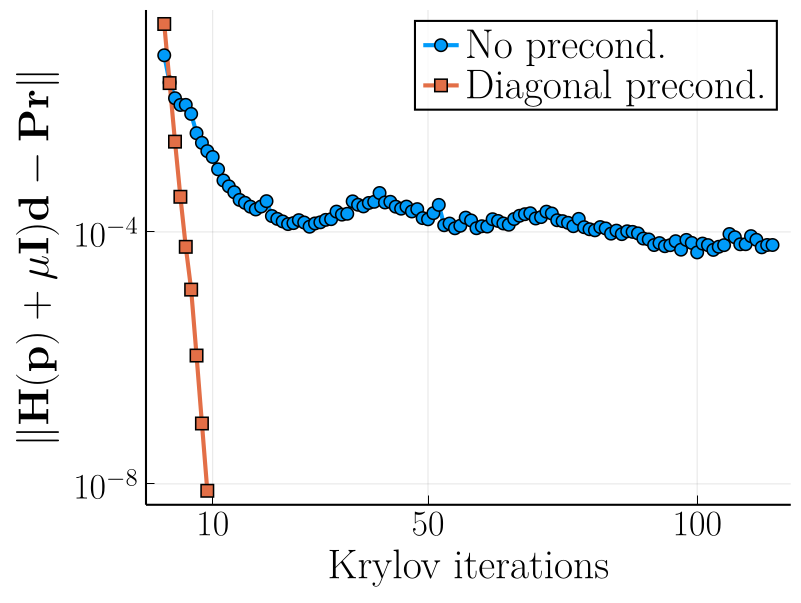

In [84]:
fig = generate_empty(; shape=:wide)
plot!(
    fig,
    ylabel=L"$\|\mathbf{H}(\mathbf{p}) + \mu \mathbf{I})\mathbf{d} - \mathbf{P}\mathbf{r}\|$",
    # title=L"$\rho := %$ρfmt~(\sigma := %$σfmt)$",
    legendbackgroundcolor=RGBA(1.0, 1.0, 1.0, 0.8),
    yticks=10.0 .^ (-16:4:3),
    xtickfont=font(18),
    ytickfont=font(18),
    xscale=:identity,
    size=(500, 400),
    xlabel=L"$\textrm{Krylov iterations}$"
)
plot!(
    fig,
    xticks=[10, 50, 100, 200, 500]
)

plot!(fig, stats.residuals[1:4:end], label=L"\textrm{No precond.}", linewidth=2, markershape=:circle)
plot!(fig, stats1.residuals, label=L"\textrm{Diagonal precond.}", linewidth=2, markershape=:rect)


In [85]:
savefig(fig, "/tmp/linsys_precond.pdf")

"/tmp/linsys_precond.pdf"

In [73]:
eigen(sqrt.(P⁻¹) * H * sqrt.(P⁻¹))

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
5000-element Vector{Float64}:
 1.0000000000000044
 1.3202138526526779
 1.3236254014381896
 1.5876618092496417
 1.615542486689083
 1.799692692958488
 1.8147646646404443
 1.8603879041399929
 1.8743113033958796
 1.8934731703438408
 ⋮
 2.4999999805863165
 2.4999999835007367
 2.4999999931100985
 2.4999999945667453
 2.49999999684104
 2.4999999970819196
 2.4999999989206665
 2.4999999991411643
 2.499999999943172
vectors:
5000×5000 Matrix{Float64}:
 -0.0406598   0.00162686   -0.000588271  …  -6.76046e-8  -2.04416e-7
 -0.0380658   0.00156609    0.000290636      4.99086e-7  -1.13947e-7
 -0.0237661   0.000734565   0.000456948     -2.15235e-6   3.90706e-7
 -0.0081975   0.000320336   0.000145847     -1.21393e-6   2.89932e-7
 -0.0593077   0.00194786   -0.000370339      1.30541e-6  -3.34888e-8
 -0.043046    0.00158029    0.000674604  …   2.14506e-6   6.56804e-7
 -0.0407304   0.00166182   -0.00021076      -1.08496e-7   2.5296e-7
 -0.0058

In [ ]:
1.0000000000000009 / 0.09999999999999895

In [ ]:
d1, stats1 = cg(H, linconstr.A', a; M=P⁻¹, rtol=1e-15, verbose=3, timemax=5.0, history=true)